In [12]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
data=pd.read_csv(r"C:\Users\ADMIN\assignment\assignment 18 forecasting\Airlines+Data.csv")

In [4]:
data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


<Axes: >

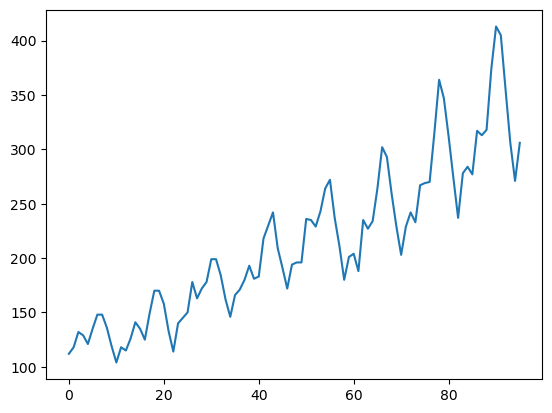

In [6]:
data.Passengers.plot()

In [7]:
data["month"] = data.Month.dt.strftime("%b") # month extraction
data["year"] = data.Month.dt.strftime("%Y") # year extraction

In [8]:
data

,Month,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995
...,...,...,...,...
91,2002-08-01,405,Aug,2002
92,2002-09-01,355,Sep,2002
93,2002-10-01,306,Oct,2002
94,2002-11-01,271,Nov,2002


<Axes: xlabel='month', ylabel='year'>

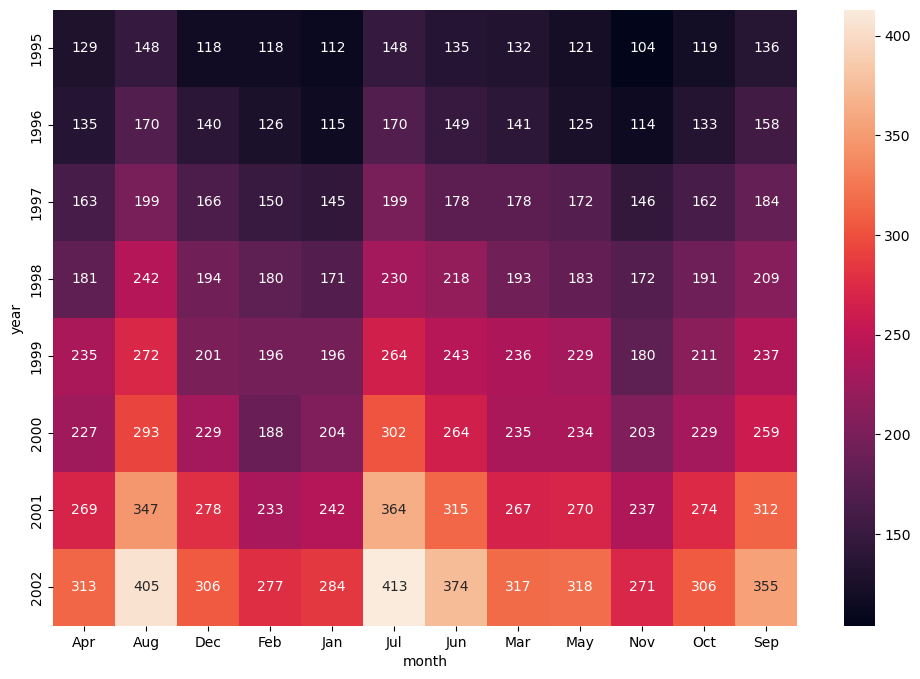

In [9]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=data,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

<Axes: xlabel='year', ylabel='Passengers'>

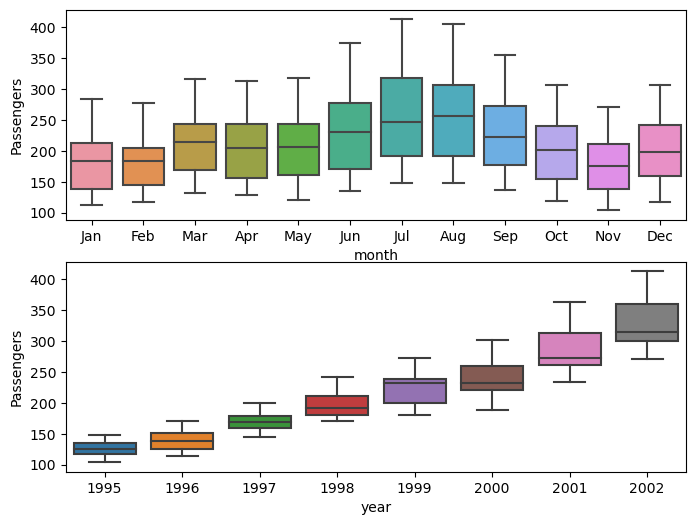

In [10]:
# Boxplot for ever
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=data)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=data)


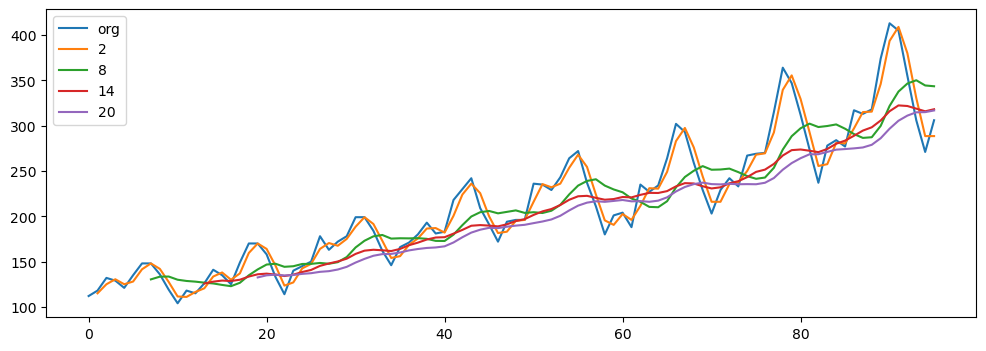

In [11]:
plt.figure(figsize=(12,4))
data.Passengers.plot(label="org")
for i in range(2,24,6):
    data["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

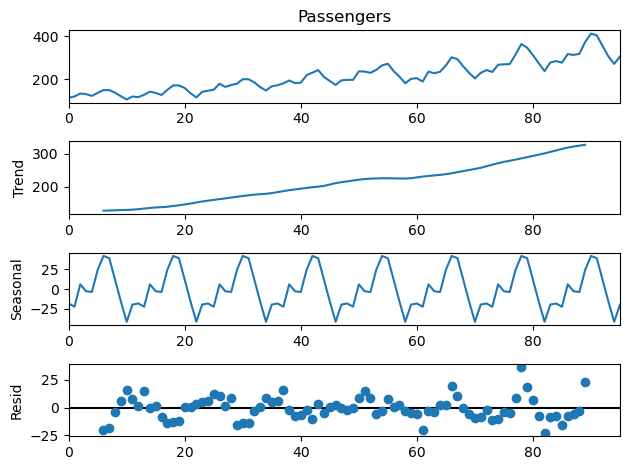

In [13]:
decompose_ts_add = seasonal_decompose(data.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

C:\Users\khsan\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


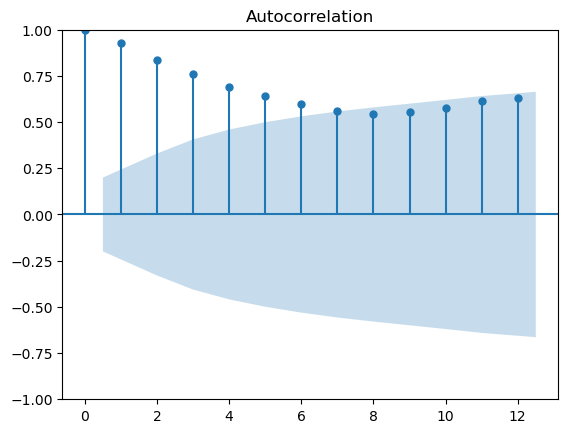

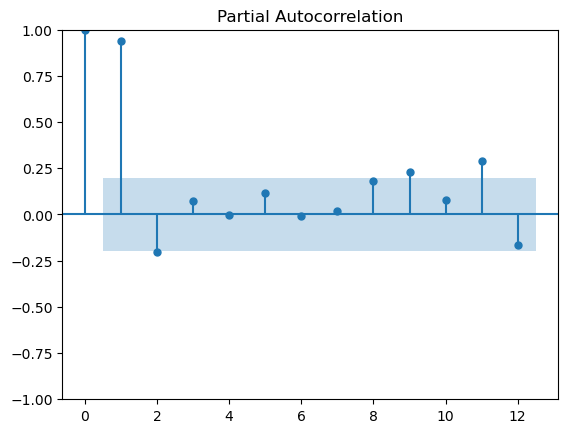

In [14]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data.Passengers,lags=12)
tsa_plots.plot_pacf(data.Passengers,lags=12)
plt.show()

In [10]:
## converting the table into the 
t=np.arange(1,len(data)+1)

In [11]:
data['t']=t
data['t_squre']=t**2
data['log_pass']=np.log(data['Passengers'])

In [12]:
data

,Month,Passengers,month,year,t,t_squre,log_pass
0,1995-01-01,112,Jan,1995,1,1,4.718499
1,1995-02-01,118,Feb,1995,2,4,4.770685
2,1995-03-01,132,Mar,1995,3,9,4.882802
3,1995-04-01,129,Apr,1995,4,16,4.859812
4,1995-05-01,121,May,1995,5,25,4.795791
...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,92,8464,6.003887
92,2002-09-01,355,Sep,2002,93,8649,5.872118
93,2002-10-01,306,Oct,2002,94,8836,5.723585
94,2002-11-01,271,Nov,2002,95,9025,5.602119


In [13]:
## splitting the data
Train = data.head(70)
Test = data.tail(26)

In [14]:
linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

48.309855853362095

In [15]:
#Exponential

Exp = smf.ols('log_pass~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['log_pass'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

303.1735078310433

In [16]:
#Quadratic 

Quad = smf.ols('Passengers~t+t_squre',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squre"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

43.89814496742653

In [17]:
## loking to the rmse valu the Quadratic  model is good model
model = smf.ols('Passengers~t+t_squre',data=Train).fit()

In [18]:
model.rsquared

0.7757004730300032

In [19]:
model.predict(Test)

70    261.125831
71    263.668089
72    266.223354
73    268.791625
74    271.372902
75    273.967186
76    276.574477
77    279.194773
78    281.828076
79    284.474386
80    287.133702
81    289.806024
82    292.491353
83    295.189689
84    297.901030
85    300.625378
86    303.362733
87    306.113094
88    308.876461
89    311.652835
90    314.442215
91    317.244602
92    320.059995
93    322.888395
94    325.729801
95    328.584213
dtype: float64

In [20]:
#### loading the second data set

In [16]:
data_coc=pd.read_excel(r"C:\Users\ADMIN\assignment\assignment 18 forecasting\CocaCola_Sales_Rawdata.csv")

In [17]:
data_coc

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


<Axes: >

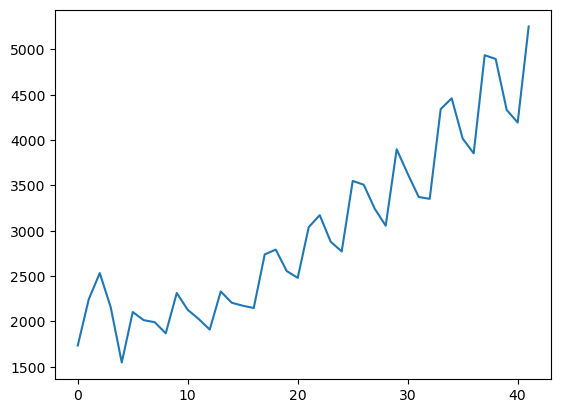

In [18]:
data_coc.Sales.plot()

In [19]:
data_coc['t']=np.arange(1,len(data_coc)+1)
data_coc['t_sqr']=data_coc.t**2
data_coc['log_sales']=np.log(data_coc.Sales)

In [20]:
data_coc

,Quarter,Sales,t,t_sqr,log_sales
0,Q1_86,1734.827000,1,1,7.458663
1,Q2_86,2244.960999,2,4,7.716443
2,Q3_86,2533.804993,3,9,7.837477
3,Q4_86,2154.962997,4,16,7.675529
4,Q1_87,1547.818996,5,25,7.344602
5,Q2_87,2104.411995,6,36,7.651791
6,Q3_87,2014.362999,7,49,7.608058
7,Q4_87,1991.746998,8,64,7.596767
8,Q1_88,1869.049999,9,81,7.533186
9,Q2_88,2313.631996,10,100,7.746574


In [21]:
coca_data=pd.get_dummies(data_coc)

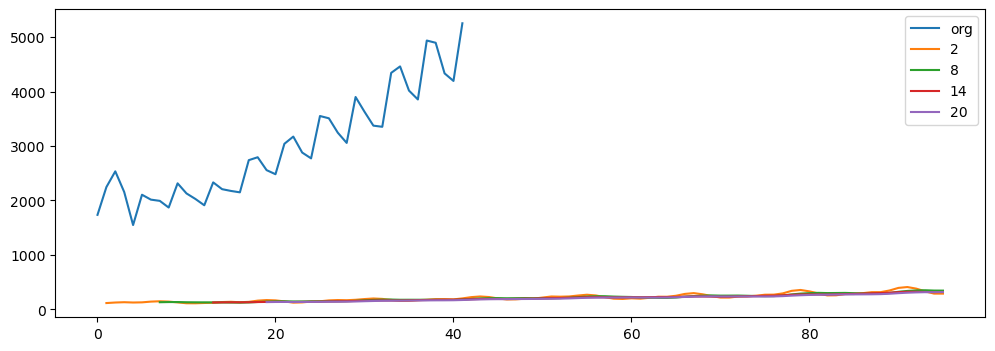

In [22]:
plt.figure(figsize=(12,4))
data_coc.Sales.plot(label="org")
for i in range(2,24,6):
    data["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

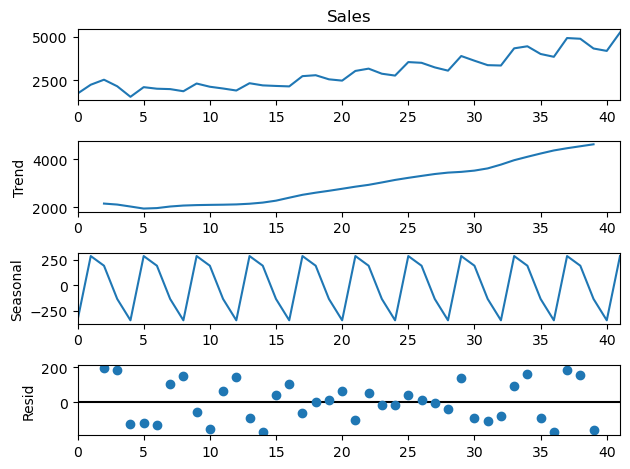

In [24]:
decompose_ts_add = seasonal_decompose(data_coc.Sales,period=4)
decompose_ts_add.plot()
plt.show()

C:\Users\khsan\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


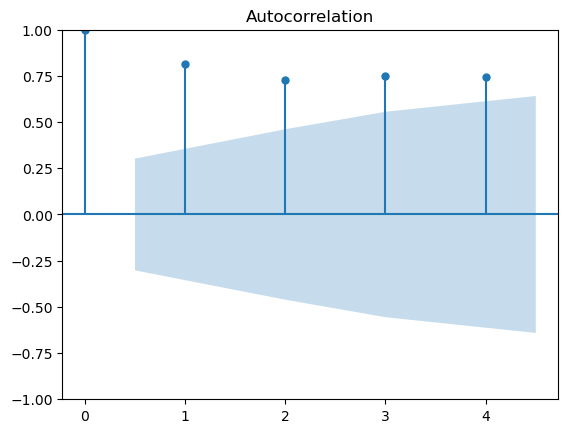

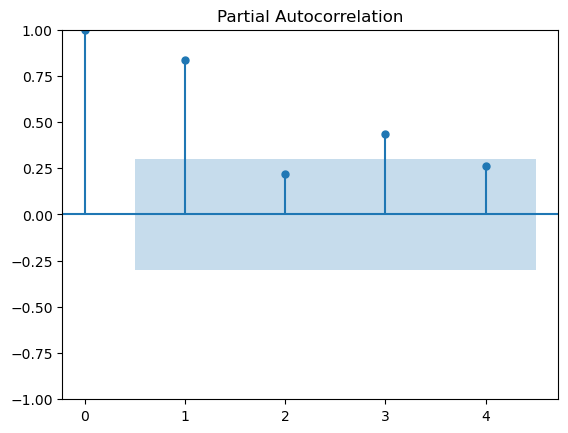

In [25]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data_coc.Sales,lags=4)
tsa_plots.plot_pacf(data_coc.Sales,lags=4)
plt.show()

In [113]:
coca_data

,Sales,t,t_sqr,log_sales,Quarter_Q1_86,Quarter_Q1_87,Quarter_Q1_88,Quarter_Q1_89,Quarter_Q1_90,Quarter_Q1_91,...,Quarter_Q4_86,Quarter_Q4_87,Quarter_Q4_88,Quarter_Q4_89,Quarter_Q4_90,Quarter_Q4_91,Quarter_Q4_92,Quarter_Q4_93,Quarter_Q4_94,Quarter_Q4_95
0,1734.827000,1,1,7.458663,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2244.960999,2,4,7.716443,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2533.804993,3,9,7.837477,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2154.962997,4,16,7.675529,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1547.818996,5,25,7.344602,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2104.411995,6,36,7.651791,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2014.362999,7,49,7.608058,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1991.746998,8,64,7.596767,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8,1869.049999,9,81,7.533186,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2313.631996,10,100,7.746574,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
## splitting the data
Train1= data_coc.head(35)
Test1= data_coc.tail(12)

In [116]:
linear_model = smf.ols('Sales~t',data=Train1).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test1['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test1['Sales'])-np.array(pred_linear))**2))
rmse_linear

566.0477740225355

In [118]:

Exp = smf.ols('log_sales~t',data=Train1).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test1['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test1['log_sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

4008.096716650216

In [121]:
#Quadratic 
Quad = smf.ols('Sales~t+t_sqr',data=Train1).fit()
pred_Quad = pd.Series(Quad.predict(Test1[["t","t_sqr"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test1['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

455.87169514324444

In [122]:
model1 = smf.ols('Sales~t+t_sqr',data=Train1).fit()

In [123]:
model1.rsquared

0.8597701209573438

In [125]:
model1.predict(Test1)

30    3672.000353
31    3796.193650
32    3924.867588
33    4058.022164
34    4195.657380
35    4337.773235
36    4484.369729
37    4635.446862
38    4791.004635
39    4951.043047
40    5115.562098
41    5284.561789
dtype: float64